In [2]:
import pandas as pd

DATASET_PATH = '../dataset'

all_postings = pd.read_csv(f'{DATASET_PATH}/postings.csv')
all_postings.head()

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,...,Requirements: \n\nWe are seeking a College or ...,1.713398e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,38480.0,8540.0,34021.0
1,1829192,NaN,Mental Health Therapist/Counselor,"At Aspen Therapy and Wellness , we are committ...",50.0,HOURLY,"Fort Collins, CO",NaN,1.0,NaN,...,NaN,1.712858e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,83200.0,80521.0,8069.0
2,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",64896719.0,8.0,NaN,...,We are currently accepting resumes for FOH - A...,1.713278e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,55000.0,45202.0,39061.0
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,175000.0,YEARLY,"New Hyde Park, NY",766262.0,16.0,NaN,...,This position requires a baseline understandin...,1.712896e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,157500.0,11040.0,36059.0
4,35982263,NaN,Service Technician,Looking for HVAC service tech with experience ...,80000.0,YEARLY,"Burlington, IA",NaN,3.0,NaN,...,NaN,1.713452e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,70000.0,52601.0,19057.0


In [3]:
all_postings.columns

Index(['job_id', 'company_name', 'title', 'description', 'max_salary',
       'pay_period', 'location', 'company_id', 'views', 'med_salary',
       'min_salary', 'formatted_work_type', 'applies', 'original_listed_time',
       'remote_allowed', 'job_posting_url', 'application_url',
       'application_type', 'expiry', 'closed_time',
       'formatted_experience_level', 'skills_desc', 'listed_time',
       'posting_domain', 'sponsored', 'work_type', 'currency',
       'compensation_type', 'normalized_salary', 'zip_code', 'fips'],
      dtype='object')

In [4]:
import pandas as pd
import re

# Define a list of programming languages, removing "Go" and ensuring accurate matches
# programming_languages = [
#     "Python", "Java", "JavaScript", "C\\+\\+", "C#", "Ruby", "Swift", "Kotlin",
#     "Rust", "PHP", "TypeScript", "Scala", "Perl", "Haskell", "Lua",
#     "Dart", "Objective-C", "MATLAB",
# ]

programming_languages = ["Python", "Java", "JavaScript", "C\\+\\+", "C#", "Ruby", "Swift", "Kotlin",
    "Rust", "PHP", "TypeScript", "Scala", "Perl", "Haskell", "Lua",
    "Dart", "Objective-C", "MATLAB", "HTML", "CSS", "SQL", "NoSQL", "MongoDB", "MySQL", "PostgreSQL",
    "React", "Angular", "Vue", "Node.js", "Express", "Flask", "Django", "Spring", "Ruby on Rails",
    "TensorFlow", "PyTorch", "Keras", "Scikit-learn", "Pandas", "NumPy", "SciPy", "Matplotlib",
    "Kubernetes", "Docker", "Jenkins", "Travis CI", "GitLab CI", "GitLab", "GitHub", "Git",
    "AWS", "Azure", "Google Cloud", "GCP", "Heroku", "DigitalOcean", "Firebase", "Netlify",
    "Linux", "Unix", "Windows", "macOS", "iOS", "Android", "Raspberry Pi", "Arduino", "ESP32",
    "REST", "GraphQL", "gRPC", "SOAP", "WebSockets", "OAuth", "JWT", "OpenID", "SAML",
    "Agile", "Scrum", "Kanban", "XP", "Pair Programming", "TDD", "BDD", "CI/CD",]

# Define additional tech-related keywords
tech_keywords = [
    "data science", "data analytics", 'machine learning', 'deep learning', 'artificial intelligence', "frontend", 'backend', 'git', 'api', 'apis', 'json', 'sdk', 'developer'
]

# Combine programming languages and tech-related keywords
combined_keywords = programming_languages + tech_keywords

# Convert the combined list into a regex pattern ensuring whole-word matches
pattern = r"\b(?:{})\b".format("|".join(combined_keywords))

# Count matches in title and description
all_postings["match_count"] = all_postings["title"].str.count(pattern, flags=re.IGNORECASE).fillna(0) + \
                    all_postings["description"].str.count(pattern, flags=re.IGNORECASE).fillna(0)

# Filter jobs that match at least 2 of the combined keywords
tech_postings = all_postings[all_postings["match_count"] >= 3].drop(columns=["match_count"])

tech_postings.head(20)


,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips
26,175485704,GOYT,Software Engineer,Job Description:GOYT is seeking a skilled and ...,NaN,NaN,"Denver, CO",76987056.0,273.0,NaN,...,NaN,1.713281e+12,NaN,0,PART_TIME,NaN,NaN,NaN,80202.0,8031.0
78,2234533717,Ideando Inc,Full Stack Engineer,"Location: Remote\nCompany Overview:SkillFit, a...",NaN,NaN,United States,69611476.0,21.0,NaN,...,NaN,1.713493e+12,NaN,0,FULL_TIME,NaN,NaN,NaN,NaN,NaN
108,3169712432,SysMind,Salesforce Vlocity Developer,Role: Salesforce Vlocity DeveloperLocation: Ne...,NaN,NaN,"Jersey City, NJ",85964.0,146.0,NaN,...,NaN,1.713211e+12,NaN,0,CONTRACT,NaN,NaN,NaN,7302.0,34017.0
116,3245063922,Saxon AI,Data Architect,Request: Data ArchitectLocation: San Francisco...,NaN,NaN,"San Francisco, CA",224935.0,7.0,NaN,...,NaN,1.713537e+12,NaN,0,CONTRACT,NaN,NaN,NaN,94101.0,6075.0
129,3366698309,Webologix Ltd/ INC,Anaplan Developer,Job Title: Anaplan Developer\n\nLocations: US ...,NaN,NaN,United States,14524845.0,2.0,NaN,...,NaN,1.713471e+12,NaN,0,FULL_TIME,NaN,NaN,NaN,NaN,NaN
146,3475933396,USLI,Senior Developer,This individual will work with a high performa...,NaN,NaN,Greater Philadelphia,33421.0,NaN,NaN,...,NaN,1.713538e+12,NaN,0,FULL_TIME,NaN,NaN,NaN,NaN,NaN
163,3533320307,NLB Services,Java architect / Lead Java developer,Position: Java architect / Lead Java developer...,NaN,NaN,"Jersey City, NJ",490432.0,3.0,NaN,...,NaN,1.712855e+12,NaN,0,FULL_TIME,NaN,NaN,NaN,7302.0,34017.0
181,3586167732,StyleAI,Senior Software Engineer,"StyleAI is the AI-powered, all-in-one unified ...",NaN,NaN,San Francisco Bay Area,90662302.0,31.0,NaN,...,NaN,1.713397e+12,NaN,0,FULL_TIME,NaN,NaN,NaN,NaN,NaN
196,3625991523,Xoriant,DDI Engineer,Title: Infoblox/DNS EngineerLocation: 6860 Yos...,NaN,NaN,"Jersey City, NJ",166996.0,24.0,NaN,...,NaN,1.713277e+12,NaN,0,CONTRACT,NaN,NaN,NaN,7302.0,34017.0
237,3700068571,Akshaya Inc,Software Implementation Program Manager,Title: Software Implementation Program Manager...,NaN,NaN,"Cupertino, CA",18838319.0,2.0,NaN,...,NaN,1.713562e+12,NaN,0,CONTRACT,NaN,NaN,NaN,95014.0,6085.0


In [5]:
print(tech_postings.shape)

(11649, 31)


In [6]:
import matplotlib.pyplot as plt

ROLE_FILTERS = {
    "Frontend Developer": [
        "frontend", "UI", "user interface", "React", "Vue", "Angular", "CSS", "HTML", "JavaScript", 
        "TypeScript", "Svelte", "Next.js", "Bootstrap", "Tailwind", "GraphQL"
    ],
    "Backend Developer": [
        "backend", "server-side", "API", "Django", "Flask", "Spring Boot", "Node.js", "SQL", "database", 
        "Redis", "PostgreSQL", "MySQL", "MongoDB", "GraphQL", "PHP", "Ruby on Rails", "FastAPI"
    ],
    "Full Stack Developer": [
        "full stack", "frontend and backend", "React", "Node.js", "Django", "Angular", "MongoDB", "Express.js", 
        "Next.js", "GraphQL", "NestJS"
    ],
    "Data Analyst": [
        "data analyst", "data analytics", "SQL", "Excel", "business intelligence", "BI", "Tableau", "Power BI", 
        "Google Analytics", "Looker", "Pandas", "NumPy", "Statistics", "ETL", "Data Warehouse"
    ],
    "Data Scientist": [
        "data scientist", "machine learning", "deep learning", "AI", "NLP", "TensorFlow", "PyTorch", "Python", 
        "R", "Scikit-learn", "Pandas", "NumPy", "Keras", "Hugging Face", "Statistics", "Big Data", "Data Mining"
    ],
    "Machine Learning Engineer": [
        "machine learning engineer", "ML", "AI models", "TensorFlow", "PyTorch", "Hugging Face", "Python", "R", 
        "Deep Learning", "LLM", "Natural Language Processing", "Computer Vision", "OpenAI"
    ],
    "Software Engineer": [
        "software engineer", "software developer", "programmer", "coding", "C++", "Java", "Python", "C#", "TypeScript",
        "Scala", "Rust", "Golang", "Kotlin", "Dart", "GraphQL", "Agile", "Scrum", "Microservices", "TDD"
    ],
    "DevOps Engineer": [
        "DevOps", "CI/CD", "Kubernetes", "Docker", "AWS", "Azure", "Jenkins", "Terraform", "Bash", "Python", 
        "Linux", "Ansible", "Puppet", "Helm", "GitOps"
    ],
    "Cloud Engineer": [
        "cloud engineer", "AWS", "Azure", "Google Cloud", "cloud computing", "Terraform", "Kubernetes", "Serverless", 
        "Lambda", "BigQuery", "IAM", "CloudFormation"
    ],
    "Mobile Developer": [
        "mobile developer", "iOS developer", "Android developer", "Swift", "Kotlin", "React Native", "Flutter", 
        "Dart", "Xamarin", "Jetpack Compose"
    ],
    "Game Developer": [
        "game developer", "Unity", "Unreal Engine", "game engine", "C++", "C#", "game programming", "Godot", 
        "HLSL", "OpenGL", "DirectX", "Shader"
    ],
    "Embedded Systems Engineer": [
        "embedded systems", "firmware", "IoT", "microcontroller", "real-time systems", "C", "C++", "FPGA", "VHDL", 
        "Verilog", "Arduino", "Raspberry Pi"
    ],
    "Cybersecurity Analyst": [
        "cybersecurity", "penetration testing", "security analyst", "ethical hacking", "SOC", "Python", "C", 
        "Bash", "Metasploit", "Kali Linux", "SIEM", "Network Security", "Threat Hunting"
    ],
    "Systems Administrator": [
        "systems administrator", "IT support", "Linux admin", "Windows server", "network security", "Bash", 
        "PowerShell", "Active Directory", "VMware", "Hyper-V", "SysAdmin"
    ],
    "Database Administrator": [
        "database administrator", "DBA", "SQL Server", "MySQL", "PostgreSQL", "MongoDB", "NoSQL", "Oracle DB", 
        "Redis", "Data Migration"
    ],
}

# Function to count matches for a job against a list of keywords
def count_matches(job_title, job_desc, keywords):
    """Returns the count of matches of the given keywords in job title and description."""
    pattern = r"\b(?:{})\b".format("|".join(map(re.escape, keywords)))  # Ensure exact word matching
    return (
        len(re.findall(pattern, job_title, re.IGNORECASE)) +
        len(re.findall(pattern, job_desc, re.IGNORECASE))
    )

def analyze_job_postings(tech_postings):
    """Analyzes job postings and visualizes the percentage of job postings by role."""
    # Initialize role counts
    role_counts = {role: 0 for role in ROLE_FILTERS}

    # Process job postings
    for _, row in tech_postings.iterrows():
        job_title = str(row["title"])
        job_desc = str(row["description"])
        
        matched_roles = []
        
        for role, keywords in ROLE_FILTERS.items():
            if count_matches(job_title, job_desc, keywords) >= 2:  # Match if count is 2 or more
                matched_roles.append(role)
        
        # Full Stack differentiation: If both Frontend & Backend are matched, prefer Full Stack
        if "Frontend Developer" in matched_roles and "Backend Developer" in matched_roles:
            matched_roles = [r for r in matched_roles if r not in ["Frontend Developer", "Backend Developer"]]
            matched_roles.append("Full Stack Developer")

        # Increment role counts
        for role in matched_roles:
            role_counts[role] += 1

    # Convert counts to percentages
    total_postings = len(tech_postings)
    role_percentages = {role: (count / total_postings) * 100 for role, count in role_counts.items()}

    # Convert results to a DataFrame
    role_percentages_df = pd.DataFrame(list(role_percentages.items()), columns=["Role", "Percentage"])

    # Visualize results
    plt.figure(figsize=(12, 6))
    plt.barh(role_percentages_df["Role"], role_percentages_df["Percentage"], color="blue")
    plt.xlabel("Percentage of Job Postings (%)")
    plt.ylabel("Tech Role")
    plt.title("Tech Job Postings by Role (Percentage)")
    plt.gca().invert_yaxis()  # Invert y-axis to show highest percentage on top
    plt.show()



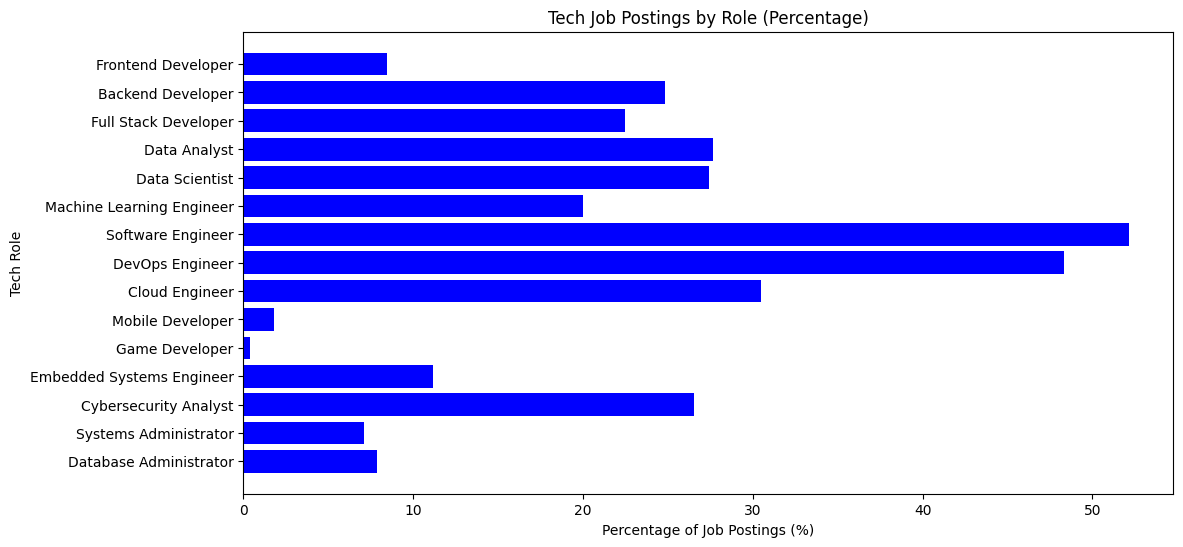

In [7]:
analyze_job_postings(tech_postings)

In [8]:
import re

def isInternship(row):
    """Check if any relevant column in the given row contains keywords related to internships."""
    intern_pattern = r"\b(?:intern|internship)\b"
    return any(
        bool(re.search(intern_pattern, str(row[col]), flags=re.IGNORECASE))
        for col in ["title", "description", "formatted_work_type", "formatted_experience_level"]
    )

# Apply the function to filter internship postings
internships = tech_postings[tech_postings.apply(isInternship, axis=1)]

internships.shape


(436, 31)

In [9]:
internships.head()

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips
284,3743875708,Bright Sparks,Unpaid Internship: Development Team,Bright Sparks Academy Internship Program\nBefo...,NaN,NaN,United States,94850267.0,4.0,NaN,...,NaN,1.713462e+12,NaN,0,VOLUNTEER,NaN,NaN,NaN,NaN,NaN
333,3784120102,OTB English,Artificial Intelligence Engineer Intern - Chatbot,Company DescriptionOTB English offers business...,NaN,NaN,United States,28154819.0,98.0,NaN,...,NaN,1.712894e+12,NaN,0,VOLUNTEER,NaN,NaN,NaN,NaN,NaN
360,3797449314,"Subaru Research and Development, Inc",Cloud Platform/ Big Data Engineer,About Subaru Research and Development:Do you c...,NaN,NaN,"Michigan, United States",91080439.0,7.0,NaN,...,NaN,1.713553e+12,NaN,0,FULL_TIME,NaN,NaN,NaN,NaN,NaN
486,3841963841,Prepto,Frontend Engineer,The ideal candidate will be responsible for de...,NaN,NaN,"Santa Clara, CA",96957627.0,76.0,NaN,...,NaN,1.712663e+12,NaN,0,FULL_TIME,NaN,NaN,NaN,95050.0,6085.0
656,3870389946,Budgetwise,Android Developer Intern (Unpaid),About Budgetwise:Budgetwise is an innovative A...,NaN,NaN,United States,74107090.0,5.0,NaN,...,NaN,1.713570e+12,NaN,0,INTERNSHIP,NaN,NaN,NaN,NaN,NaN


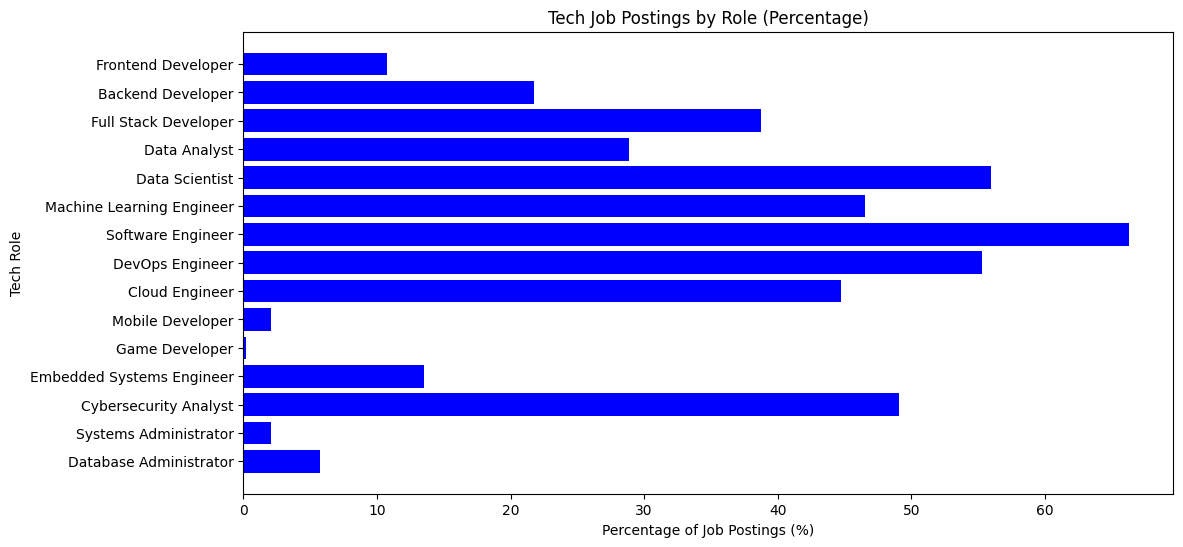

In [10]:
analyze_job_postings(internships)

In [11]:


# Define regex pattern for "intern" and "internship" as whole words
internship_pattern = r"\b(?:intern|internship)\b"

# Define cybersecurity-related keywords
cybersecurity_keywords = [
    "cybersecurity", "security", "penetration testing", "ethical hacking", 
    "SOC", "threat intelligence", "incident response", "SIEM", 
    "firewall", "forensics", "network security", "malware analysis",
    "security analyst", "security engineer"
]

# Convert cybersecurity keywords to a regex pattern ensuring word boundaries
cybersecurity_pattern = r"\b(?:{})\b".format("|".join(map(re.escape, cybersecurity_keywords)))

# Filtering for internships
internship_posts = tech_postings[
    tech_postings["title"].str.contains(internship_pattern, flags=re.IGNORECASE, na=False) |
    tech_postings["description"].str.contains(internship_pattern, flags=re.IGNORECASE, na=False) |
    tech_postings["formatted_work_type"].str.contains(internship_pattern, flags=re.IGNORECASE, na=False) |
    tech_postings["formatted_experience_level"].str.contains(internship_pattern, flags=re.IGNORECASE, na=False)
]

# Filtering for cybersecurity-related jobs within the internships
cybersecurity_internships = internship_posts[
    internship_posts["title"].str.contains(cybersecurity_pattern, flags=re.IGNORECASE, na=False) |
    internship_posts["description"].str.contains(cybersecurity_pattern, flags=re.IGNORECASE, na=False)
]

cybersecurity_internships.shape

(115, 31)

In [12]:
cybersecurity_internships.head(20)

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips
3847,3884856372,Arista Networks,Network Advanced Services Engineer (Wireless o...,Company Description\n\nArista Networks is a fa...,NaN,NaN,"Los Angeles, CA",80069.0,20.0,NaN,...,NaN,1.712401e+12,jobs.smartrecruiters.com,0,FULL_TIME,NaN,NaN,NaN,90001.0,6037.0
5302,3884989892,Amazon Web Services (AWS),"Senior Sw Development Engineer, AWS SDK for Py...",Description\n\nAWS Utility Computing (UC) prov...,261500.0,YEARLY,"Seattle, WA",2382910.0,6.0,NaN,...,NaN,1.712362e+12,www.amazon.jobs,0,FULL_TIME,USD,BASE_SALARY,198000.0,98101.0,53033.0
5374,3884994024,Amazon Web Services (AWS),"Front End Engineer II, AWS Accessibility",Description\n\nAWS Utility Computing (UC) prov...,NaN,NaN,"Arlington, VA",2382910.0,9.0,NaN,...,NaN,1.712362e+12,www.amazon.jobs,0,FULL_TIME,NaN,NaN,NaN,22201.0,51013.0
6429,3885115131,"360 SOC, Inc.",SOC Analyst Internship,"We are currently seeking a motivated, career a...",NaN,NaN,United States,6374862.0,1267.0,NaN,...,NaN,1.712453e+12,NaN,0,INTERNSHIP,NaN,NaN,NaN,NaN,NaN
8695,3886448947,Pacific Northwest National Laboratory,Undergraduate Technical Intern - Digital Twin ...,Overview\n\nAt a time when complex environment...,NaN,NaN,"Richland, WA",4714.0,4.0,NaN,...,NaN,1.712634e+12,careers.pnnl.gov,0,TEMPORARY,NaN,NaN,NaN,99352.0,53005.0
9145,3886465317,Trane Technologies,Application Developer,At Trane TechnologiesTM and through our busine...,123000.0,YEARLY,"La Crosse, WI",64259963.0,11.0,NaN,...,NaN,1.712636e+12,careers.tranetechnologies.com,0,FULL_TIME,USD,BASE_SALARY,90500.0,54601.0,55063.0
9272,3886476851,Actian,Cloud Security Engineer Intern,Company\n\nOur Vision is to be the Most Truste...,NaN,NaN,United States,2340954.0,43.0,NaN,...,NaN,1.712638e+12,jobs.lever.co,0,INTERNSHIP,NaN,NaN,NaN,NaN,NaN
11020,3887475125,"TalentBurst, an Inc 5000 company",Network Engineer,"Title: Network EngineerLocation: Plano, TXDura...",35.0,HOURLY,"Plano, TX",122451.0,32.0,NaN,...,NaN,1.712346e+12,NaN,0,CONTRACT,USD,BASE_SALARY,70720.0,75023.0,48085.0
12636,3887701133,Peraton Labs,Cybersecurity Research Engineer,About Peraton\n\nPeraton is a next-generation ...,138000.0,YEARLY,"Silver Spring, MD",11683433.0,5.0,NaN,...,NaN,1.712349e+12,careers.peraton.com,0,FULL_TIME,USD,BASE_SALARY,112000.0,20901.0,24031.0
13972,3887855378,Business Umbrella -Recruitment-Training-Consul...,International Student - Study and Work Opportu...,Location: United Arab Emirates (UAE)Job Descri...,NaN,NaN,NAMER,27169698.0,36.0,NaN,...,NaN,1.712368e+12,NaN,0,FULL_TIME,NaN,NaN,NaN,NaN,NaN
